In [8]:
import numpy as np
from cgd_funcs import Funcs
from cgd import CGD

# Of the shelf solver CGD
from scipy.optimize import minimize
from numpy import linalg as la

# Plotting
import matplotlib.pyplot as plt

font = {'size':15}
plt.rc('font', **font)

In [9]:
# loading the matrices
M1 = np.loadtxt('../data/M1.txt')
x0_m1 = np.loadtxt('../data/x0_m1.txt')

M2 = np.loadtxt('../data/M2.txt')
x0_m2 = np.loadtxt('../data/x0_m2.txt')

M3 = np.loadtxt('../data/M3.txt')
x0_m3 = np.loadtxt('../data/x0_m3.txt')

M4 = np.loadtxt('../data/M4.txt')
x0_m4 = np.loadtxt('../data/x0_m4.txt')

M5 = np.loadtxt('../data/M5.txt')
x0_m5 = np.loadtxt('../data/x0_m5.txt')

### Util Function for off-shelf CGD solved

In [25]:
def off_shelf_opt(matrix, vector):
    funcs = Funcs(matrix)
    res = minimize(funcs.func_, vector, method='CG', jac=funcs.func_grad_, tol=1e-5, options={'gtol': 1e-5, 'disp': False})
    fx = res.fun
    
    num_iterations = res.nit
    if res.success:
        print("Convergence reached in " + str(num_iterations) + " iterations")
    else:
        print("Convergence not reached")
    
    computed_norm = np.sqrt(-fx)
    correct_norm = la.norm(matrix, 2)
    error = abs(computed_norm - correct_norm) / abs(correct_norm)
    
    print("Computed Norm: " + str(computed_norm))
    print("True Norm: " + str(correct_norm))
    print("Relative Error: " + str(error))

In [24]:
def plot_summary(error_mx, residual_mx, matrix):
    
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].plot(list(range(0,len(residual_mx))), residual_mx, label = "Residual")
    axs[1].plot(list(range(0,len(error_mx))), error_mx, label = "Relative Error", color="orange")
    
    axs[0].legend()
    axs[1].legend()
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Residual")
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Relative Error")
    fig.suptitle("["+matrix+"]"+"[epsilon = 1e-5] Residual and Relative Error plot")
    #fig.suptitle(matrix_name + " " + method_name + " Residual and Error plot")

### M1 - Matrix Test

In [12]:
funcs = Funcs(M1)
m1_norm = np.linalg.norm(M1, ord=2)
# Initialize the CGD algorithm.
cgd_m1 = CGD(m1_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m1, 1e-5, 1000, method='FR', verboose=False)
# Run the algorithm.
residual_m1, errors_m1, result_m1 = cgd_m1.cgd()

In [55]:
%%timeit -r 10
# Measuring running time
cgd_m1.cgd()

633 ms ± 135 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


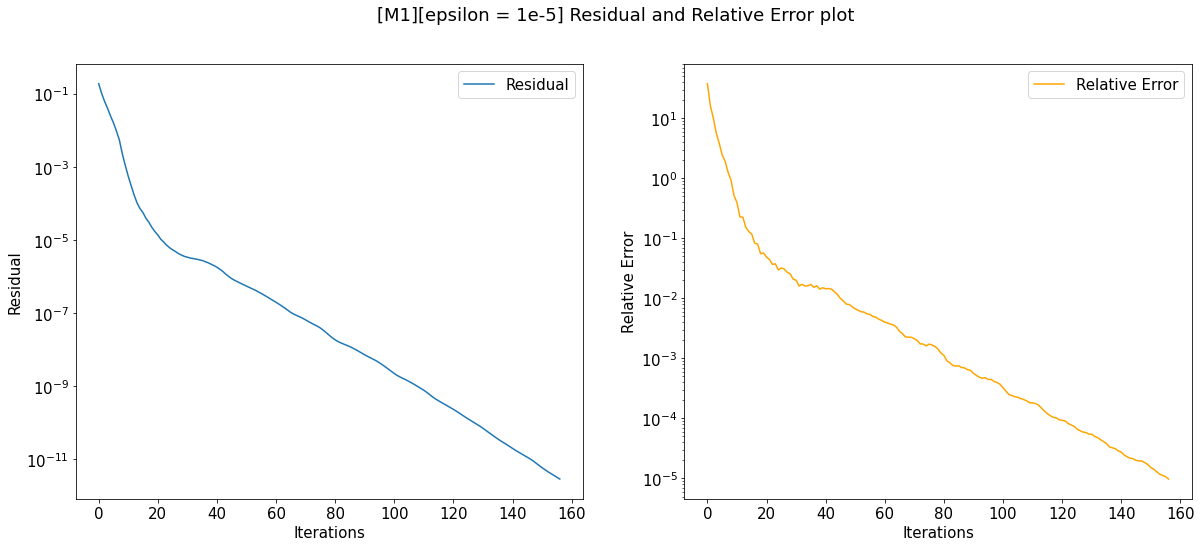

In [13]:
plot_summary(residual_m1, errors_m1, "M1")

In [57]:
%%timeit -r 10
# Norm of matrix M1
np.linalg.norm(M1, ord=2)

542 ms ± 30.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [58]:
# CGD norm result
np.sqrt(abs(result_m1))

72.40864404735305

In [15]:
# Relative Error
abs(m1_norm - np.sqrt(abs(result_m1))) / abs(m1_norm)

2.875195694052239e-12

In [26]:
off_shelf_opt(M1, x0_m1)
funcs = Funcs(M1)

Convergence reached in 55 iterations
Computed Norm: 72.4086440466481
True Norm: 72.40864404756124
Relative Error: 1.2610824199114038e-11


### M2 - Matrix Test

In [16]:
funcs = Funcs(M2)
# Initialize the CGD algorithm.
m2_norm = np.linalg.norm(M2, ord=2)
cgd_m2 = CGD(m2_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m2, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m2, errors_m2, result_m2 = cgd_m2.cgd()

In [17]:
len(errors_m2)

79

In [62]:
%%timeit -r 10
# Measuring running time
cgd_m2.cgd()

23.4 ms ± 1.53 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


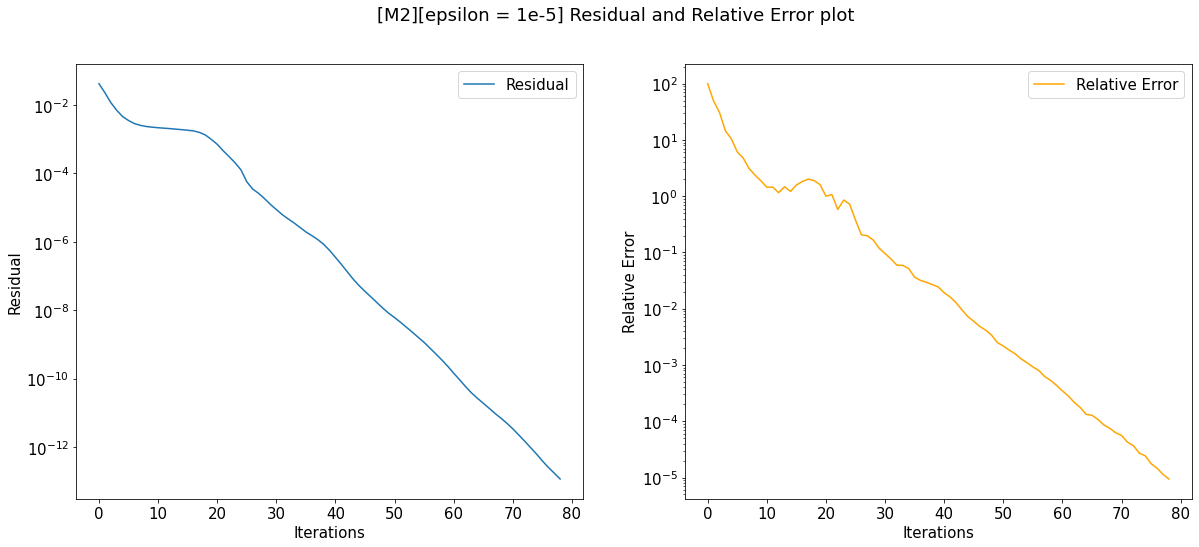

In [18]:
plot_summary(residual_m2, errors_m2, "M2")

In [64]:
%%timeit -r 10
# Norm of matrix M2
np.linalg.norm(M2, ord=2)

79.8 ms ± 2 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [65]:
# CGD norm result
np.sqrt(abs(result_m2))

109.46751097961935

In [28]:
# Relative Error
abs(m2_norm - np.sqrt(abs(result_m2))) / abs(m2_norm)

1.1488894111508427e-13

In [27]:
off_shelf_opt(M2, x0_m2)
funcs = Funcs(M2)

Convergence reached in 74 iterations
Computed Norm: 109.46751097925296
True Norm: 109.46751097963192
Relative Error: 3.46185694092198e-12


### M3 - Matrix Test

In [29]:
funcs = Funcs(M3)
# Initialize the CGD algorithm.
m3_norm = np.linalg.norm(M3, ord=2)
cgd_m3 = CGD(m3_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m3, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m3, errors_m3, result_m3 = cgd_m3.cgd()

In [30]:
len(errors_m3)

88

In [69]:
%%timeit -r 10
# Measuring running time
cgd_m3.cgd()

336 ms ± 45.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


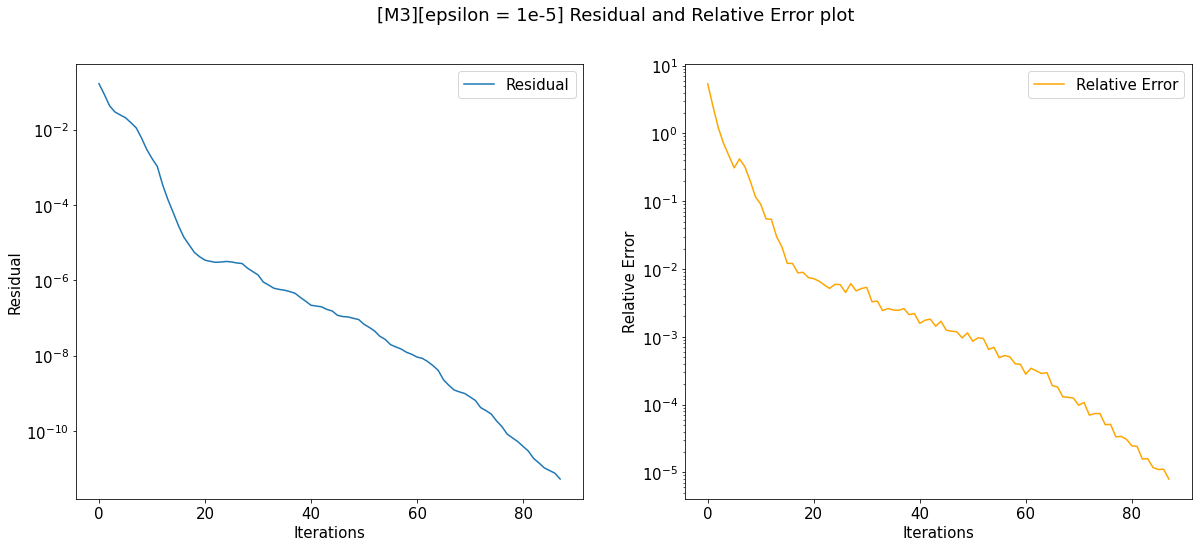

In [31]:
plot_summary(residual_m3, errors_m3, "M3")

In [95]:
%%timeit -r 10
# Norm of matrix M3
np.linalg.norm(M3, ord=2)

12.7 ms ± 2.23 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [32]:
# CGD norm result
np.sqrt(abs(result_m3))

41.06555327343059

In [33]:
# Error
abs(m3_norm - np.sqrt(abs(result_m3))) / abs(m3_norm)

5.254121518907607e-12

In [34]:
off_shelf_opt(M3, x0_m3)
funcs = Funcs(M3)

Convergence reached in 33 iterations
Computed Norm: 41.06555327005083
True Norm: 41.06555327364635
Relative Error: 8.755571499720812e-11


In [75]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m3, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

394 ms ± 91.7 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### M4 - Matrix Test

In [35]:
funcs = Funcs(M4)
# Initialize the CGD algorithm.
m4_norm = np.linalg.norm(M4, ord=2)
cgd_m4 = CGD(m4_norm, funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m4, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m4, errors_m4, result_m4 = cgd_m4.cgd()

In [36]:
len(errors_m4)

40

In [97]:
%%timeit -r 10
# Measuring running time
cgd_m4.cgd()

14.1 ms ± 491 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


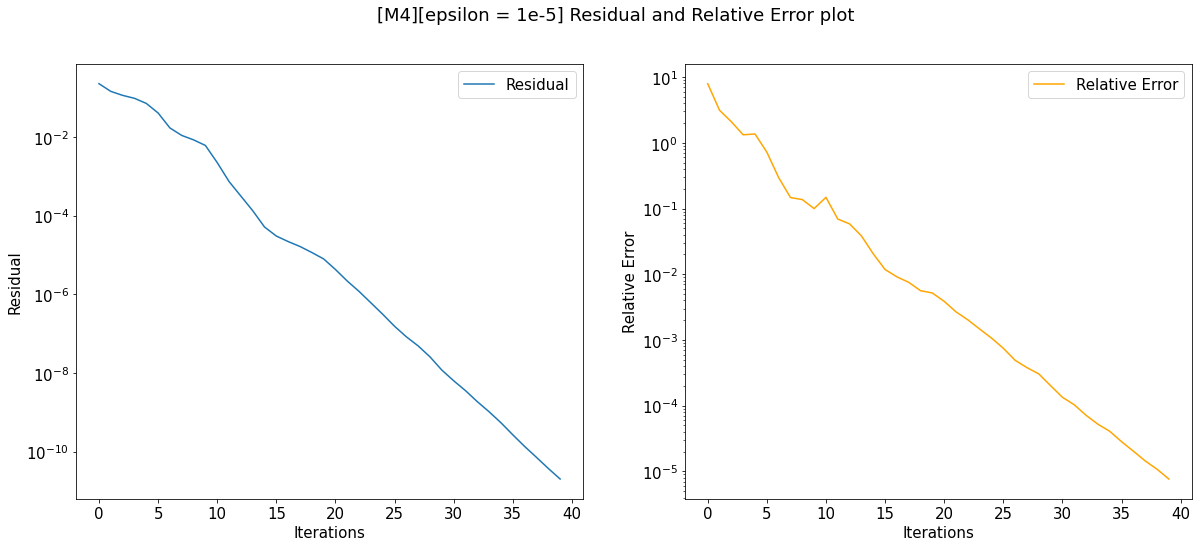

In [37]:
plot_summary(residual_m4, errors_m4, "M4")

In [100]:
%%timeit -r 10
# Norm of matrix M4
np.linalg.norm(M4, ord=2)

1.83 ms ± 401 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [38]:
# CGD norm result
np.sqrt(abs(result_m4))

19.356959368547194

In [39]:
# Error
abs(m4_norm - np.sqrt(abs(result_m4))) / abs(m4_norm)

2.011801528597993e-11

In [40]:
off_shelf_opt(M4, x0_m4)
funcs = Funcs(M4)

Convergence reached in 29 iterations
Computed Norm: 19.356959368632996
True Norm: 19.356959368936618
Relative Error: 1.5685418904422073e-11


### M5 - Matrix Test

In [41]:
funcs = Funcs(M5)
# Initialize the CGD algorithm.
m5_norm = np.linalg.norm(M5, ord=2)
cgd_m5 = CGD(m5_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m5, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m5, errors_m5, result_m5 = cgd_m5.cgd()

In [42]:
len(errors_m5)

20

In [87]:
%%timeit -r 10
# Measuring running time
cgd_m5.cgd()

7.57 ms ± 1.46 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


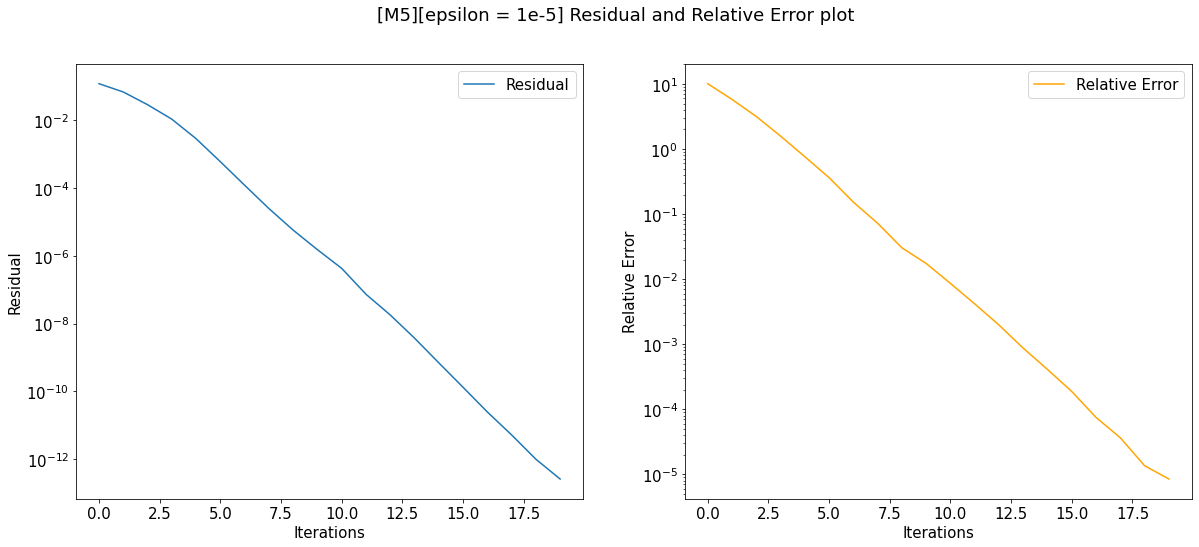

In [43]:
plot_summary(residual_m5, errors_m5, "M5")

In [89]:
%%timeit -r 10
# Norm of matrix M5
np.linalg.norm(M5, ord=2)

5.74 ms ± 691 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [90]:
np.linalg.norm(M5, ord=2)

23.62489238197046

In [91]:
# CGD norm result
np.sqrt(abs(result_m5))

23.624892381964386

In [44]:
# Error
abs(m5_norm - np.sqrt(abs(result_m5))) / abs(m5_norm)

2.571499709935251e-13

In [45]:
off_shelf_opt(M5, x0_m5)
funcs = Funcs(M5)

Convergence reached in 20 iterations
Computed Norm: 23.624892381928493
True Norm: 23.62489238197046
Relative Error: 1.7764401212552703e-12
